In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.gridspec as gridspec
import math
import collections

In [2]:
def generate_voxel_sphere(grid_size, radius):
    # Create a binary 3D grid
    grid = np.zeros((grid_size, grid_size, grid_size))

    # Create a sphere in the grid
    center = np.array([grid_size // 2, grid_size // 2, grid_size // 2])

    for x in range(grid_size):
        for y in range(grid_size):
            for z in range(grid_size):
                distance = np.linalg.norm(np.array([x, y, z]) - center)
                if distance < radius:
                    grid[x, y, z] = 1
                    
    return grid

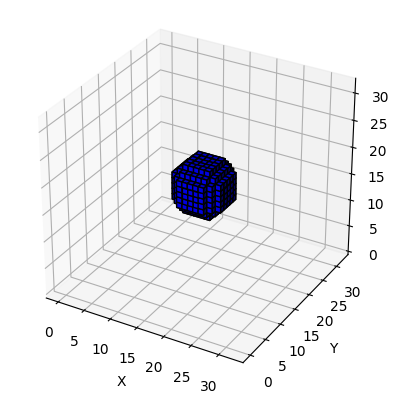

In [3]:
radius = 5
grid = generate_voxel_sphere(32, radius)
# Plot the sphere using ax.voxels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.voxels(grid, facecolors='blue', edgecolor='k')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')

plt.show()

In [4]:
sample_dir = '/Users/ryanhuang/Desktop/data/sphere_data_voxel14'
os.makedirs(sample_dir, exist_ok=True)

In [5]:
grid_size = 30
data_size = 1
# generate spheres
for i in range(data_size):
    # save as .npz
    for j in range(5, 16):
        occupancy_grid = generate_voxel_sphere(grid_size, j)
        np.savez_compressed(sample_dir + '/' + f'sphere_r{j}_{i}', a=occupancy_grid)

In [6]:
sphere_dict = {}
for radius in range(2, 21):
    grid = generate_voxel_sphere(32, radius)

    sphere_dict[radius] = grid

In [7]:
def sphere_fit(grid):
    radius_fit = 0
    max_count = 0
    for r in sphere_dict:
        count = 0
        for i in range(32):
            for j in range(32):
                for k in range(32):
                    if sphere_dict[r][i][j][k] == grid[i][j][k]:
                        count += 1
        if count > max_count:
            radius_fit = r
            max_count = count
    
    return radius_fit

In [8]:
import random

radii = []
for i in range(200):
    path = f"/Users/ryanhuang/Desktop/Code/Shape_3DGAN/data/generated/pretrained_generated/pretrained_generated{i}.npz"
    saved_grid = np.load(path)['a']
    
    approx_r = sphere_fit(saved_grid)
    
    radii.append(approx_r)


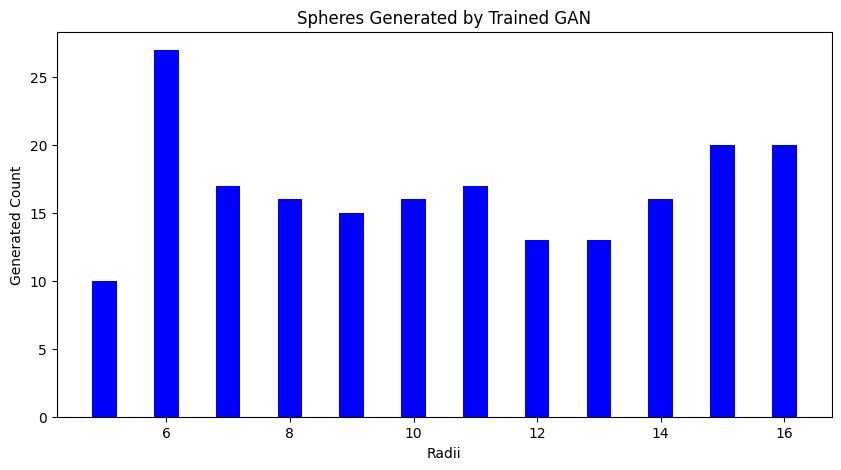

In [9]:
data = collections.Counter(radii)

courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue', 
        width = 0.4)
 
plt.xlabel("Radii")
plt.ylabel("Generated Count")
plt.title("Spheres Generated by Trained GAN")
plt.show()